# Transfer Learning using Keras

                                                                                                  -Abhishek Hosamath

The book "Deep Learning", Goodfellow et al descirbe transfer learning as a "Situation where what has been learned in one setting is exploited to improve generalization in another setting". Basically it is a machine learning method where a model developed for some task is used as the starting point for a model on a second task.

It is a widely used approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks, as it takes a large amount of time and resources to train and develop these neural network models. Using a pre-trained models helps give a huge boost in predictions as these models would have already seen huge amounts of data in their respective training sets.

To put this method to test, we will use the MNSIT dataset to do the following:
1. Create a model to and train it to learn digits from 0-4 in the MNIST dataset. 
2. Test its performance on digits 0-9.
3. Freeze the layers from in the model to retain the trained weights that the model has learnt from training on 0-4 digits. 
4. Add new layers to this model and train on digits 5-9 and test its performace.  
5. Test its performance on digits 0-9.

We will do this using two approaches:

- Using a dense layered model
- Using a CNN model

We will then see which approach is more effective.

Import necessary libraries to perform the above task.

In [83]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, BatchNormalization, InputLayer, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

We will first load the data and split the data into train and test sets. We will then divide those data sets into two parts - first one containing digits 0 - 4 and the next containing 5 - 9.

In [120]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [121]:
train_mask04 = np.isin(y_train, [0,1,2,3,4])
test_mask04 = np.isin(y_test, [0,1,2,3,4])

train_mask59 = np.isin(y_train, [5,6,7,8,9])
test_mask59 = np.isin(y_test, [5,6,7,8,9])

In [122]:
zerofour_xtrain, zerofour_ytrain = X_train[train_mask04], y_train[train_mask04]
zerofour_xtest, zerofour_ytest = X_test[test_mask04], y_test[test_mask04]

fivenine_xtrain, fivenine_ytrain = X_train[train_mask59], y_train[train_mask59]
fivenine_xtest, fivenine_ytest = X_test[test_mask59], y_test[test_mask59]

In [123]:
print(zerofour_xtrain.shape)
print(zerofour_xtest.shape)
print(zerofour_ytrain.shape)
print(zerofour_ytest.shape)

print(fivenine_xtrain.shape)
print(fivenine_xtest.shape)
print(fivenine_ytrain.shape)
print(fivenine_ytest.shape)

(30596, 28, 28)
(5139, 28, 28)
(30596,)
(5139,)
(29404, 28, 28)
(4861, 28, 28)
(29404,)
(4861,)


We can see that there are:
- 30596 images in the train set and and 5139 images in the test set for digits 0-4
- 29404 images in the train set and and 4861 images in the test set for digits 5-9
- Each image in the train set is of the size 28 x 28 (784 pixels in total)

## Dense Layered Model

We will have to process the data by reshaping them in order to fit them into the dense layered network. We will feed each input layer of the model with one pixel, meaning the input layer will have 784 inputs.  

In [124]:
num_classes = 10
zerofour_xtrain = zerofour_xtrain.reshape(30596, 784)
zerofour_xtest = zerofour_xtest.reshape(5139, 784)
zerofour_xtrain = zerofour_xtrain.astype('float32')
zerofour_xtest = zerofour_xtest.astype('float32')
zerofour_xtrain /= 255
zerofour_xtest /= 255


fivenine_xtrain = fivenine_xtrain.reshape(29404, 784)
fivenine_xtest = fivenine_xtest.reshape(4861, 784)
fivenine_xtrain = fivenine_xtrain.astype('float32')
fivenine_xtest = fivenine_xtest.astype('float32')
fivenine_xtrain /= 255
fivenine_xtest /= 255


print(zerofour_xtrain.shape[0], '0-4 train samples')
print(zerofour_xtest.shape[0], '0-4 test samples')
print(fivenine_xtrain.shape[0], '5-9 train samples')
print(fivenine_xtest.shape[0], '5-9 test samples')

# convert class vectors to binary class matrices
zerofour_ytrain = keras.utils.to_categorical(zerofour_ytrain, num_classes)
zerofour_ytest = keras.utils.to_categorical(zerofour_ytest, num_classes)


fivenine_ytrain = keras.utils.to_categorical(fivenine_ytrain, num_classes)
fivenine_ytest = keras.utils.to_categorical(fivenine_ytest, num_classes)

print(zerofour_ytrain.shape)
print(fivenine_ytrain.shape)

30596 0-4 train samples
5139 0-4 test samples
29404 5-9 train samples
4861 5-9 test samples
(30596, 10)
(29404, 10)


We will repreat the process for testing digits 0-9.

In [125]:
testnum_classes=10
X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_test = keras.utils.to_categorical(y_test, testnum_classes)

10000 test samples


### Dense layered model

We have instantiated a simple model with 4 layers for updating the weights with relu activation and 1 softmax layer to categorize the output into theor respective layers. We will use batch normalization and dropout layers to avoid overfitting of the data.

In [139]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_35 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_36 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
__________

We will fit the data with a batch size of 128 and train the model for 10 epochs.

In [140]:
epochs = 10
batch_size = 128
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(zerofour_xtrain, zerofour_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(zerofour_xtest, zerofour_ytest))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 9s 280us/step - loss: 0.1523 - acc: 0.9577 - val_loss: 0.0335 - val_acc: 0.9891
Epoch 2/10
30596/30596 [==============================] - 5s 156us/step - loss: 0.0566 - acc: 0.9829 - val_loss: 0.0274 - val_acc: 0.9912
Epoch 3/10
30596/30596 [==============================] - 5s 156us/step - loss: 0.0413 - acc: 0.9862 - val_loss: 0.0261 - val_acc: 0.9916
Epoch 4/10
30596/30596 [==============================] - 5s 155us/step - loss: 0.0347 - acc: 0.9891 - val_loss: 0.0252 - val_acc: 0.9926
Epoch 5/10
30596/30596 [==============================] - 5s 156us/step - loss: 0.0240 - acc: 0.9919 - val_loss: 0.0261 - val_acc: 0.9924
Epoch 6/10
30596/30596 [==============================] - 5s 166us/step - loss: 0.0198 - acc: 0.9940 - val_loss: 0.0199 - val_acc: 0.9930
Epoch 7/10
30596/30596 [==============================] - 5s 163us/step - loss: 0.0280 - acc: 0.9914 - val_loss: 0.0302 - v

In [141]:
score = model.evaluate(zerofour_xtest, zerofour_ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02339904654226187
Test accuracy: 0.9926055652850749


We can see that the model performed well and achieved validation accuracies of more than 99% by the 2nd epoch itself.

We will now test evaluate the model on digits 0-9.

In [142]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.0166323867797855
Test accuracy: 0.5101


As expected, the model has an accuracy of 51% as it is able to classify digits from 0-4 only.

#### Freezing layers

We will now proceed to freeze the layers in the above model. We will then remove the last layer (softmax), so that we can add two trainable layers in order to train it on digits 5-9.

In [143]:
for layer in model.layers:
    layer.trainable = False

In [144]:
#Removing the last softmax layer
model.pop()

In [145]:
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(testnum_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_35 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_36 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
__________

/home/abhi/anaconda3/envs/lantern/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [146]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.core.Dense object at 0x7f07211e8a90>,dense_56,False
1,<keras.layers.normalization.BatchNormalization object at 0x7f07211e8828>,batch_normalization_35,False
2,<keras.layers.core.Dropout object at 0x7f07211e8780>,dropout_27,False
3,<keras.layers.core.Dense object at 0x7f07211f7c50>,dense_57,False
4,<keras.layers.normalization.BatchNormalization object at 0x7f07211fdf98>,batch_normalization_36,False
5,<keras.layers.core.Dropout object at 0x7f07211369b0>,dropout_28,False
6,<keras.layers.core.Dense object at 0x7f072106c4a8>,dense_58,False
7,<keras.layers.normalization.BatchNormalization object at 0x7f072106c908>,batch_normalization_37,False
8,<keras.layers.core.Dropout object at 0x7f0720fc1898>,dropout_29,False
9,<keras.layers.core.Dense object at 0x7f071eb8f7b8>,dense_60,True


From the above we can see that the layers from the previous model are frozen and only the last five newly added layers are trainable. 

We will double check the model weights to see if they've been updated by calling the get_weights() function.

In [147]:
model.get_weights()

[array([[-6.2228322e-02, -1.1332549e-02, -8.9131296e-05, ...,
         -7.1691789e-02, -2.6874021e-03, -3.7517916e-02],
        [-2.3680013e-02,  7.4881449e-02, -4.0348418e-02, ...,
          2.4221241e-03, -7.1790047e-02, -2.0405579e-02],
        [ 6.9822073e-02, -5.4065585e-02, -5.8012594e-02, ...,
         -5.2018851e-02,  7.5389296e-02, -6.3448936e-02],
        ...,
        [ 4.4198722e-02,  5.4896012e-02,  2.9791504e-02, ...,
          6.6902250e-02,  2.6004076e-02, -5.9493616e-02],
        [ 3.3999048e-02,  2.9114686e-02,  1.7888002e-02, ...,
         -5.0788801e-02, -5.7063237e-02, -2.6329316e-02],
        [-2.6984684e-02,  5.8158025e-02,  5.6639209e-02, ...,
          2.2924677e-02,  7.2833970e-02, -5.9508864e-02]], dtype=float32),
 array([-1.36442399e-02,  1.26603022e-02,  5.21024205e-02,  3.24310735e-02,
         3.87845151e-02,  3.23623233e-02,  4.68583964e-03,  4.70417179e-03,
        -3.96622568e-02, -2.43954659e-02, -2.96674427e-02, -2.13703997e-02,
        -6.06346363e-0

We will not train the model with digits 5 -9 for just two epochs and check its performance to see of the model is able to classify the digits based on the weights updated from the leasrning of digits 0 - 4.

In [148]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

epochs=5
history = model.fit(fivenine_xtrain, fivenine_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(fivenine_xtest, fivenine_ytest))

Train on 29404 samples, validate on 4861 samples
Epoch 1/5
29404/29404 [==============================] - 9s 290us/step - loss: 0.5058 - acc: 0.8513 - val_loss: 0.3616 - val_acc: 0.8735
Epoch 2/5
29404/29404 [==============================] - 5s 172us/step - loss: 0.3216 - acc: 0.8931 - val_loss: 0.3598 - val_acc: 0.8784
Epoch 3/5
29404/29404 [==============================] - 5s 163us/step - loss: 0.2839 - acc: 0.9044 - val_loss: 0.3456 - val_acc: 0.8825
Epoch 4/5
29404/29404 [==============================] - 5s 163us/step - loss: 0.2606 - acc: 0.9115 - val_loss: 0.3043 - val_acc: 0.8949
Epoch 5/5
29404/29404 [==============================] - 5s 161us/step - loss: 0.2511 - acc: 0.9133 - val_loss: 0.2268 - val_acc: 0.9220


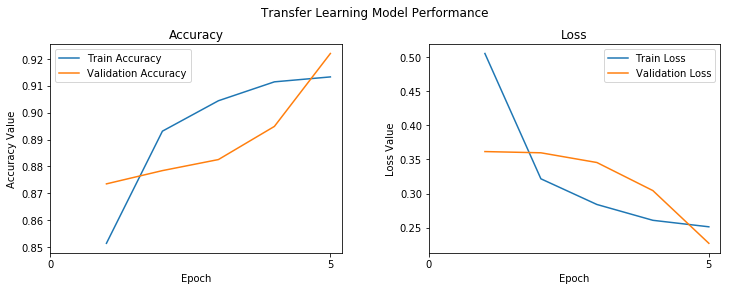

In [149]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,6))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 6, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 6, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

From the above, we can see that the validation accuracy of the model is more than 90%, which shows that the model is able to learn some features of the digits from the frozen layer. Training the model on some more epochs would probably give better accuracy values.

#### Testing the model on digits 0 - 9

In [150]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.38508157043457
Test accuracy: 0.4482


As expected, the model is now able to classify only digits 5 - 9 and the accuracy is only 45%. Though the feature extraction layers may recognize the digits 0 - 4, the two dense layers just before the softmax layer have not been optimized to classify them. 

### CNN model

We will repeat the above steps for a CNN model. We will have to do some preprocessing of the data as the input for the CNN model will be slightly different. We will resphape the data into 28 x 28 to feed single them into the model.

In [97]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

train_mask04 = np.isin(y_train, [0,1,2,3,4])
test_mask04 = np.isin(y_test, [0,1,2,3,4])

train_mask59 = np.isin(y_train, [5,6,7,8,9])
test_mask59 = np.isin(y_test, [5,6,7,8,9])

zerofour_xtrain, zerofour_ytrain = X_train[train_mask04], y_train[train_mask04]
zerofour_xtest, zerofour_ytest = X_test[test_mask04], y_test[test_mask04]

fivenine_xtrain, fivenine_ytrain = X_train[train_mask59], y_train[train_mask59]
fivenine_xtest, fivenine_ytest = X_test[test_mask59], y_test[test_mask59]


In [98]:
num_classes = 10
zerofour_xtrain = zerofour_xtrain.reshape(30596, 28, 28, 1)
zerofour_xtest = zerofour_xtest.reshape(5139, 28, 28, 1)
zerofour_xtrain = zerofour_xtrain.astype('float32')
zerofour_xtest = zerofour_xtest.astype('float32')
zerofour_xtrain /= 255
zerofour_xtest /= 255


fivenine_xtrain = fivenine_xtrain.reshape(29404, 28, 28, 1)
fivenine_xtest = fivenine_xtest.reshape(4861, 28, 28, 1)
fivenine_xtrain = fivenine_xtrain.astype('float32')
fivenine_xtest = fivenine_xtest.astype('float32')
fivenine_xtrain /= 255
fivenine_xtest /= 255


print(zerofour_xtrain.shape[0], '0-4 train samples')
print(zerofour_xtest.shape[0], '0-4 test samples')
print(fivenine_xtrain.shape[0], '5-9 train samples')
print(fivenine_xtest.shape[0], '5-9 test samples')

# convert class vectors to binary class matrices
zerofour_ytrain = keras.utils.to_categorical(zerofour_ytrain, num_classes)
zerofour_ytest = keras.utils.to_categorical(zerofour_ytest, num_classes)


fivenine_ytrain = keras.utils.to_categorical(fivenine_ytrain, num_classes)
fivenine_ytest = keras.utils.to_categorical(fivenine_ytest, num_classes)

print(zerofour_ytrain.shape)
print(fivenine_ytrain.shape)

30596 0-4 train samples
5139 0-4 test samples
29404 5-9 train samples
4861 5-9 test samples
(30596, 10)
(29404, 10)


In [105]:
testnum_classes=10
X_test = X_test.reshape(10000, 28,28,1)
X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_test = keras.utils.to_categorical(y_test, testnum_classes)

10000 test samples


We will initialize the CNN model with 3 convolution 2D layers, a flatten layer to flatten to the output of the convolution layers to be fed into a dense layer, and finally a softmax layer to classify the outputs.

In [99]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3),  padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3),  padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
__________

In [102]:
epochs = 10
batch_size = 128
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model2.fit(zerofour_xtrain, zerofour_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(zerofour_xtest, zerofour_ytest))
                    
score = model2.evaluate(zerofour_xtest, zerofour_ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 13s 426us/step - loss: 0.2099 - acc: 0.9386 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 2/10
30596/30596 [==============================] - 11s 346us/step - loss: 0.0340 - acc: 0.9894 - val_loss: 0.0170 - val_acc: 0.9944
Epoch 3/10
30596/30596 [==============================] - 11s 346us/step - loss: 0.0181 - acc: 0.9941 - val_loss: 0.0101 - val_acc: 0.9963
Epoch 4/10
30596/30596 [==============================] - 11s 349us/step - loss: 0.0125 - acc: 0.9963 - val_loss: 0.0083 - val_acc: 0.9969
Epoch 5/10
30596/30596 [==============================] - 11s 354us/step - loss: 0.0094 - acc: 0.9973 - val_loss: 0.0069 - val_acc: 0.9973
Epoch 6/10
30596/30596 [==============================] - 11s 355us/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0068 - val_acc: 0.9981
Epoch 7/10
30596/30596 [==============================] - 11s 357us/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0

In [106]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.729284095001221
Test accuracy: 0.5129


From the above, we can see that the CNN model has slightly better perfomance than the fully connected dense layered model achieving a validation score of 99.8%.

We will repeat the same process as we did for the previous model, i.e., freezing the layers, removing the last layer and adding one dense layer to train digits 5 - 9. In this case, we will be using the CNN layers as a feature extracor.  

In [108]:
for layer in model2.layers:
    layer.trainable = False

In [109]:
model2.pop()

In [111]:
model2.add(Dense(512, activation='relu', input_dim=input_shape))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
__________

In [112]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.Conv2D object at 0x7f064d76cb70>,conv2d_4,False
1,<keras.layers.pooling.MaxPooling2D object at 0x7f064d79c048>,max_pooling2d_4,False
2,<keras.layers.convolutional.Conv2D object at 0x7f064d854668>,conv2d_5,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f064d79ab00>,max_pooling2d_5,False
4,<keras.layers.convolutional.Conv2D object at 0x7f064d79c4a8>,conv2d_6,False
5,<keras.layers.pooling.MaxPooling2D object at 0x7f07258770f0>,max_pooling2d_6,False
6,<keras.layers.core.Flatten object at 0x7f064d79a828>,flatten_2,False
7,<keras.layers.core.Dense object at 0x7f0725877f60>,dense_45,False
8,<keras.layers.core.Dense object at 0x7f07257c68d0>,dense_47,True
9,<keras.layers.normalization.BatchNormalization object at 0x7f064f3ae320>,batch_normalization_29,True


In [114]:
model2.get_weights()

[array([[[[ 0.16694504, -0.0004167 , -0.08669265, -0.17020941,
            0.03255703, -0.08397155, -0.14857985,  0.05471667,
           -0.20343332,  0.27417168,  0.03639649, -0.04887952,
            0.06252845, -0.21515475,  0.1631512 ,  0.11337031,
            0.09967542,  0.15214221,  0.08464318, -0.06742468,
           -0.07985238,  0.08859202, -0.09692499,  0.03976519,
            0.12731932,  0.01179805,  0.098065  ,  0.05568466,
            0.16954449, -0.09537518, -0.13780454, -0.09156366]],
 
         [[ 0.0441309 ,  0.12550758, -0.21766783, -0.1619041 ,
            0.18215196,  0.19642706,  0.02543828,  0.07028255,
           -0.15928131,  0.17332968,  0.13030382,  0.00444619,
            0.04744581, -0.05617697,  0.21168558, -0.0729174 ,
            0.0784587 ,  0.03312295,  0.1002475 , -0.22975019,
            0.06890235, -0.1711853 ,  0.18707047,  0.0604145 ,
            0.22679588,  0.01396151,  0.05220435,  0.16822648,
           -0.09770411,  0.00742884,  0.01998963, -

In [116]:
epochs=5
history = model2.fit(fivenine_xtrain, fivenine_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(fivenine_xtest, fivenine_ytest))
score = model2.evaluate(fivenine_xtest, fivenine_ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 29404 samples, validate on 4861 samples
Epoch 1/5
29404/29404 [==============================] - 7s 244us/step - loss: 0.2291 - acc: 0.9337 - val_loss: 0.1130 - val_acc: 0.9626
Epoch 2/5
29404/29404 [==============================] - 5s 156us/step - loss: 0.1168 - acc: 0.9636 - val_loss: 0.1212 - val_acc: 0.9591
Epoch 3/5
29404/29404 [==============================] - 5s 156us/step - loss: 0.1076 - acc: 0.9654 - val_loss: 0.1176 - val_acc: 0.9617
Epoch 4/5
29404/29404 [==============================] - 5s 161us/step - loss: 0.1011 - acc: 0.9681 - val_loss: 0.0911 - val_acc: 0.9689
Epoch 5/5
29404/29404 [==============================] - 5s 161us/step - loss: 0.0996 - acc: 0.9678 - val_loss: 0.0932 - val_acc: 0.9681
Test loss: 0.09318082255760207
Test accuracy: 0.9681135567709439


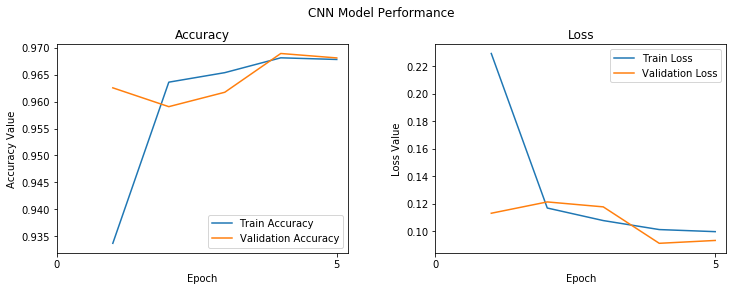

In [119]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,6))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 6, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 6, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

We can see that the validation accuracy of the model is alomst 96% in the very first epoch for the validation set with just one single epoch - this model has only one dense layer unlike the the previous model with two additional layers to train the secong set of digits. This clearly shows that the model is able to extract most features of the digits from the frozen layers.

#### Testing both models on digits 0 - 9

In [117]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.841955877685547
Test accuracy: 0.4706


As expected, the model is now able to classify only digits 5 - 9. Again, though the feature extraction layers may recognize the digits 0 - 4, the dense layer just before the softmax layer has not been optimized to classify them. Hence the accuracy is 47%.

## Conclusion

We can see that transfer learning is a great way to quickly use pretrained models to get great results on new data.

- Transfer learning helps easily of transfering knowledge from one model to another based on domains and tasks.
- The CNN models are a better image classifiers, better feature extractors and outperform the densely connected models by a substantial margin when classifying images. 

Though the above models were trained on just the MNSIT dataset for a few epochs, using other trained models like VGG, Inception, XCeption (for computer vision) and Word2Vec, GloVe and FastText (for NLP) will produce far better reuslts and provide scope to easily create models with outstanding performance and minimal training.